### What is an Outlier?
It is a completely different record or data point which deviates so much from the other data points.

### Why there are outliers in a dataset?
The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

For instance, there is a column of salary of people whose age is between 25 to 30. Now most of the times you will see salaries between 3 to 6 lakhs. But there are certain exceptions where salary is 44 and 50 lakhs also. This can be a mistake or it is showing a variance in your data that there are people who earn that much in that age.

Now how would you decide whether these outliers are important or not. If they are the result of mistake, we can ignore them, but if it is a variance in the data we would need to think.

### Why outliers should be treated?
Outliers cause significant impact on the Mean and Variance.

### How outliers should be treated?
If they are the result of mistake, we can remove them.
If it is a variance in the data we cannot remove them because an outlier can be very informative about the subject-area and data collection process. So it should be treated in such a way that they do not distort statistical analyses (does not change mean and variance).

### Detecting an outlier

In [18]:
import pandas as pd
import numpy as np

# titanic dataset
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's detect outliers for `Age` column

First let's see whether the `Age` follows normal distribution or is *left skewed* or *right skewed*

Because, for normal distribution we use z-score to find outliers. And for left skewed and right skewed distribution we find outliers by IQR (interquartile range) or boxplot.

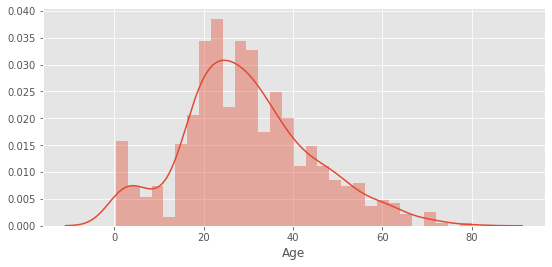

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(9,4))
plt.style.use("ggplot")
sns.distplot(data["Age"], bins=30)

`Age` follows normal distribution

### Z - score
Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. **normal distribution.**<br>
So according to Empirical Formula 99.7% of data fall within three standard deviations of the mean. Any data point beyond three standard deviations of the mean is considered as an outlier.<br><br>
Z-score = (x(i) - mean) / standard deviation

In [20]:
# Z-score function to detect outliers
def detect_outliers(column):
    threshold=3
    mean= data[column].mean()
    std= data[column].std()
    outliers= []
    for i in data["Age"].values:
        z_score= abs((i-mean)/std)
        if z_score > 3:
            outliers.append(i)
    return outliers

In [21]:
detect_outliers("Age")

[80.0, 74.0]

In `Age` the data points **74** and **80** are the outliers

In [22]:
# upper and lower boundaries
print("lower_bundary:", data["Age"].mean() - 3*data["Age"].std())
print("upper_boundary:", data["Age"].mean() + 3*data["Age"].std())

lower_bundary: -13.88037434994331
upper_boundary: 73.27860964406095


In [23]:
# Here I'll be using another dataset which has a column representing skewed distribution
data2= pd.read_csv("new_train.csv")
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


detecting outlier in age column

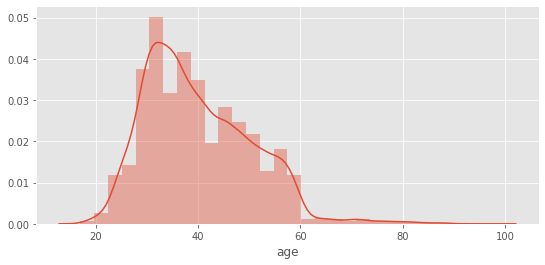

In [24]:
plt.figure(figsize=(9,4))
plt.style.use("ggplot")
sns.distplot(data2["age"], bins=30)

`age` is skewed towadrs right

### Box Plot

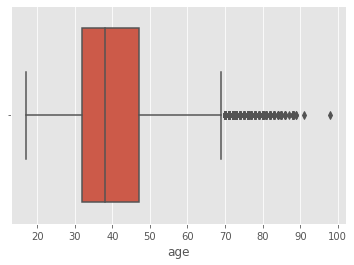

In [25]:
sns.boxplot(data2["age"])

There are so many outliers

### IQR - Inter Quartile Range

In [26]:
data2.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [27]:
# compute interquantile range to calculate the boundaries
Q3= data2["age"].quantile(0.75)
Q1= data2["age"].quantile(0.25)
IQR= Q3 - Q1
 
# lower and upper boundaries
lower_bound= data2["age"].quantile(0.25) - (1.5*IQR)
upper_bound= data2["age"].quantile(0.75) + (1.5*IQR)

print("lower_bound:", lower_bound,"\n""upper_bound:", upper_bound)

lower_bound: 9.5 
upper_bound: 69.5


So any data point below lower_bound and upper_bound will be considered as outliers

In [28]:
# following are the outliers in age
data2[(data2["age"] > upper_bound) | (data2["age"] < lower_bound)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
68,71,retired,married,professional.course,no,no,no,cellular,sep,fri,313,1,999,0,nonexistent,no
88,77,retired,married,basic.4y,no,unknown,unknown,cellular,jul,tue,218,2,3,1,success,yes
109,80,retired,married,basic.4y,no,yes,no,cellular,mar,thu,156,1,999,0,nonexistent,yes
280,81,retired,married,basic.6y,no,no,no,cellular,aug,thu,189,2,4,1,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32165,82,retired,married,university.degree,no,yes,no,cellular,oct,tue,215,1,999,0,nonexistent,yes
32186,76,retired,married,professional.course,no,no,no,cellular,aug,mon,308,1,15,1,success,yes
32464,70,blue-collar,married,basic.4y,no,no,yes,cellular,jun,fri,252,1,3,1,success,yes
32554,76,retired,married,basic.4y,no,yes,no,cellular,aug,fri,406,1,999,0,nonexistent,no


### Handling Outliers
Since we cannot remove the outliers in every case, we will replace them by some value.

Replacing the outliers in `Age` column of Titanic dataset

In [29]:
# for titanic data upper and lower boundaries are

print("lower_bundary:", data["Age"].mean() - 3*data["Age"].std())
print("upper_boundary:", data["Age"].mean() + 3*data["Age"].std())

lower_bundary: -13.88037434994331
upper_boundary: 73.27860964406095


In [38]:
# replace the all the Age values which is greater then 73 by 73
data_without_outliers= data.copy()
data_without_outliers.loc[data_without_outliers["Age"] > 73, "Age"] = 73

In [40]:
# with outliers in Age
data= pd.read_csv("train.csv")
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
# without outliers in Age
data_without_outliers["Age"].describe()

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

We can see that after replacing the outliers with the upper boundary, the maximum age value has been changed from 80 to 73 without impacting any other parameters like mean, standard deviation and quartiles.